In [8]:
%pip install statsmodels sklearn

  Using cached statsmodels-0.14.4-cp311-cp311-win_amd64.whl.metadata (9.5 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
!pip install statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 991.0 kB/s eta 0:00:12
    --------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.3/11.1 MB 2.0 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.1 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.1 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.1 MB 2.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/11.1 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.1 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.1 MB 2.6 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.1 MB 2.7 MB/s eta 0:00:04
   ---- ----------------------------------- 1.4/11.1 MB 2.7 MB/s eta 0:00:04
   ----- ---------------------------------- 1.4/11.1 MB 2.6 MB/s eta 0:00:04
   -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\krras\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
df = pd.read_csv(r'D:\kovai.co\Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv')
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


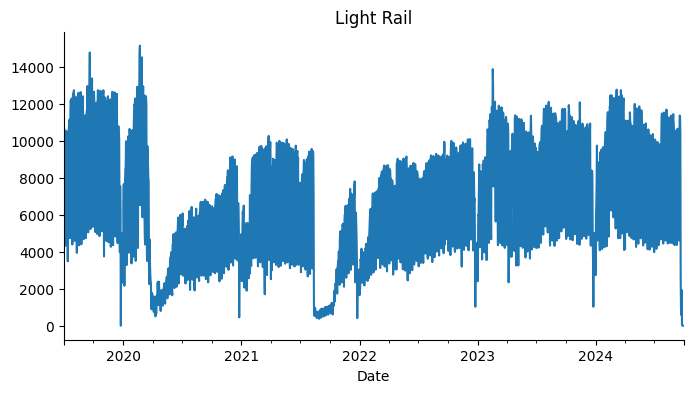

In [17]:
from matplotlib import pyplot as plt
df['Light Rail'].plot(kind='line', figsize=(8, 4), title='Light Rail')
plt.gca().spines[['top', 'right']].set_visible(False)

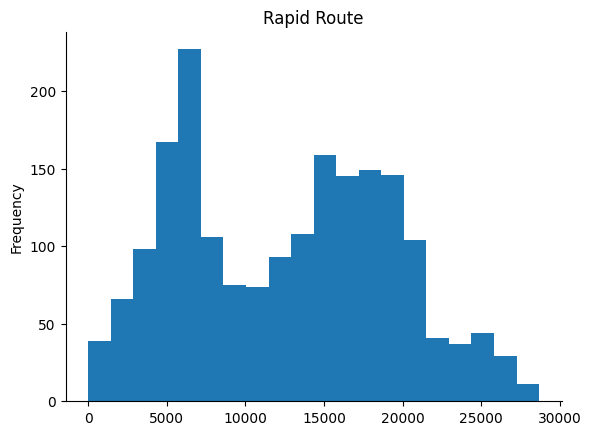

In [18]:
from matplotlib import pyplot as plt
df['Rapid Route'].plot(kind='hist', bins=20, title='Rapid Route')
plt.gca().spines[['top', 'right',]].set_visible(False)

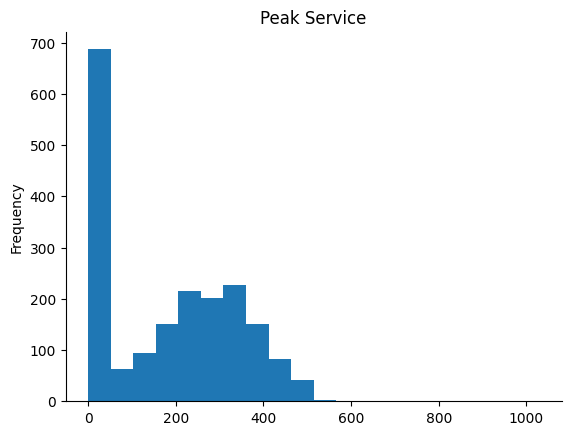

In [19]:

from matplotlib import pyplot as plt
df['Peak Service'].plot(kind='hist', bins=20, title='Peak Service')
plt.gca().spines[['top', 'right',]].set_visible(False)

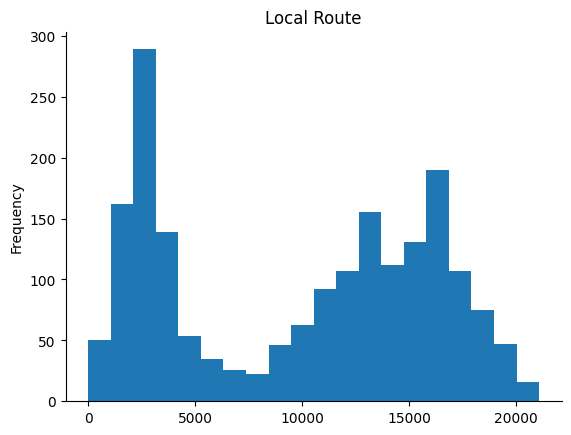

In [20]:
from matplotlib import pyplot as plt
df['Local Route'].plot(kind='hist', bins=20, title='Local Route')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# For ARIMA
from statsmodels.tsa.arima.model import ARIMA

# For XGBoost
from xgboost import XGBRegressor


In [23]:
last_date = df.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')

In [24]:
def forecast_arima_future(series, future_dates, order=(5, 1, 2)):
    model = ARIMA(series, order=order)
    fitted = model.fit()
    forecast = fitted.forecast(steps=len(future_dates))

    plt.figure(figsize=(10, 8))
    plt.plot(series.index[-30:], series.values[-30:], label="Recent Actuals") # Plot recent actuals for context
    plt.plot(future_dates, forecast, label="ARIMA Forecast (Next 7 Days)", marker='s', linestyle='--')
    plt.title(f"{series.name} - ARIMA Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid()

    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

    print(f"ARIMA Forecast for next 7 days:\n{pd.Series(forecast.values, index=future_dates)}")
    return fitted.summary()

In [25]:
def forecast_xgb_future(series, future_dates, lag=7):
    values = series.values
    X, y = [], []

    for i in range(lag, len(values)):
        X.append(values[i - lag:i])
        y.append(values[i])

    X, y = np.array(X), np.array(y)

    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X, y)

    # Prepare the last 'lag' data points to forecast the next day
    last_batch = values[-lag:]

    forecast = []
    current_batch = last_batch.copy()

    for i in range(len(future_dates)):
        next_day_forecast = model.predict(current_batch.reshape(1, -1))[0]
        forecast.append(next_day_forecast)
        current_batch = np.append(current_batch[1:], next_day_forecast)

    plt.figure(figsize=(10, 7))
    plt.plot(series.index[-30:], series.values[-30:], label="Recent Actuals")
    plt.plot(future_dates, forecast, label="XGBoost Forecast (Next 7 Days)", marker='s', linestyle='--')
    plt.title(f"{series.name} - XGBoost Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

    print(f"XGBoost Forecast for next 7 days:\n{pd.Series(forecast, index=future_dates)}")


======= FORECASTING FOR LOCAL ROUTE (NEXT 7 DAYS) =======

🔹 ARIMA:


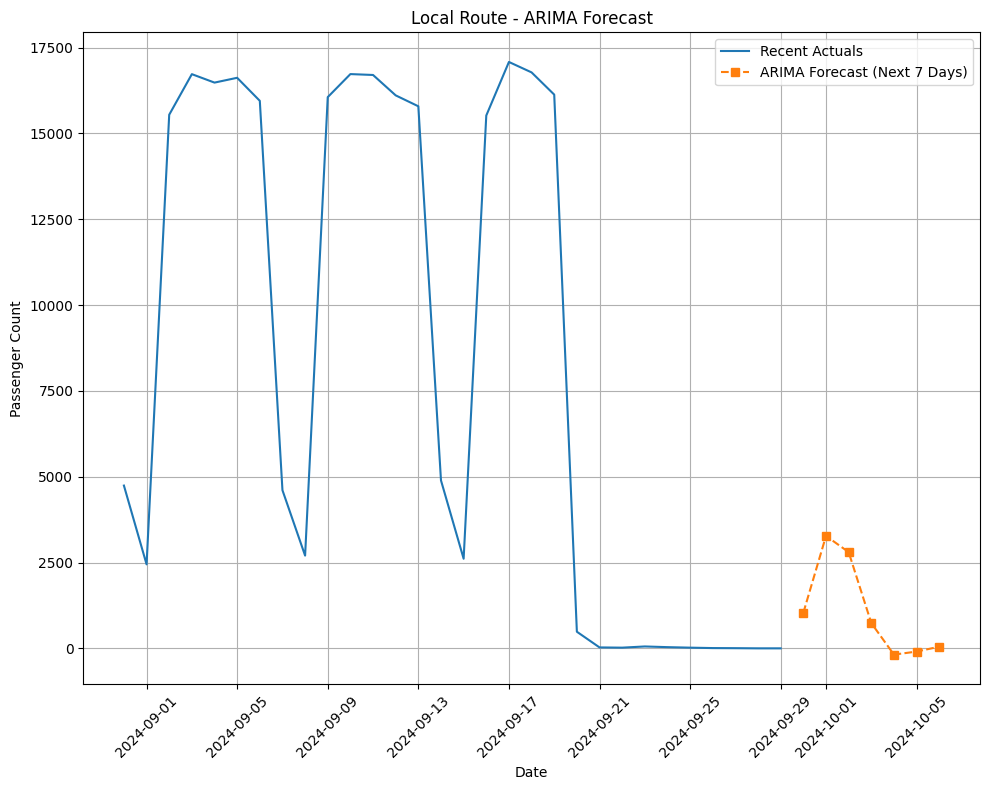

ARIMA Forecast for next 7 days:
2024-09-30    1036.619017
2024-10-01    3274.693147
2024-10-02    2804.753955
2024-10-03     737.424418
2024-10-04    -181.746691
2024-10-05     -92.820706
2024-10-06      48.626762
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            Local Route   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17999.459
Date:                Mon, 26 May 2025   AIC                          36014.917
Time:                        12:08:33   BIC                          36059.385
Sample:                    07-01-2019   HQIC                         36031.280
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

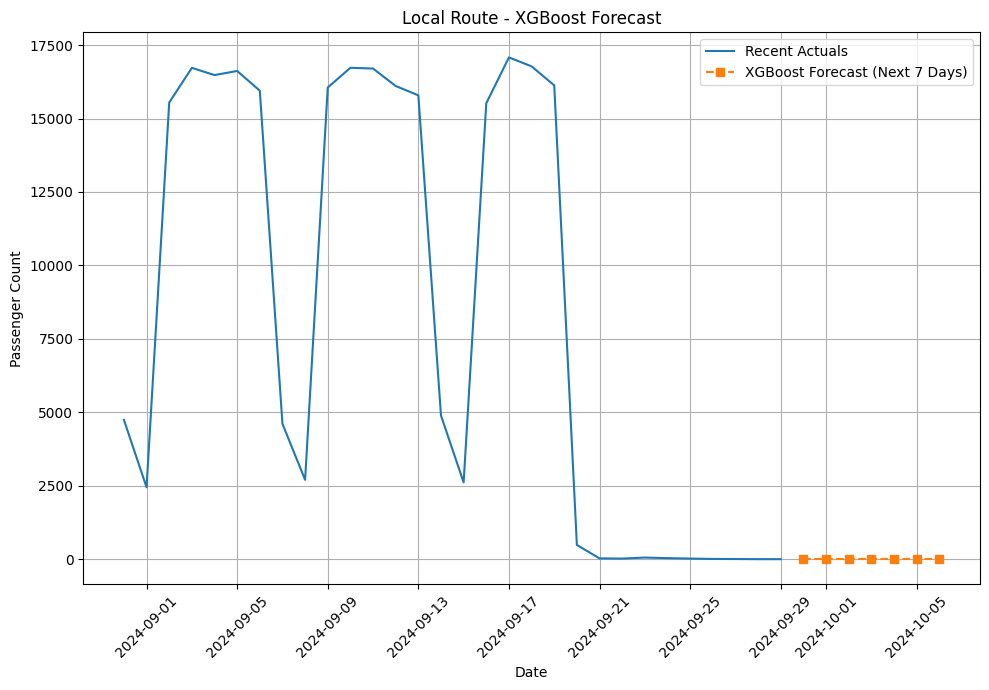

XGBoost Forecast for next 7 days:
2024-09-30    13.742357
2024-10-01    13.742357
2024-10-02    13.742357
2024-10-03    13.742357
2024-10-04    13.742357
2024-10-05    13.742357
2024-10-06    13.742357
Freq: D, dtype: float32

======= FORECASTING FOR LIGHT RAIL (NEXT 7 DAYS) =======

🔹 ARIMA:


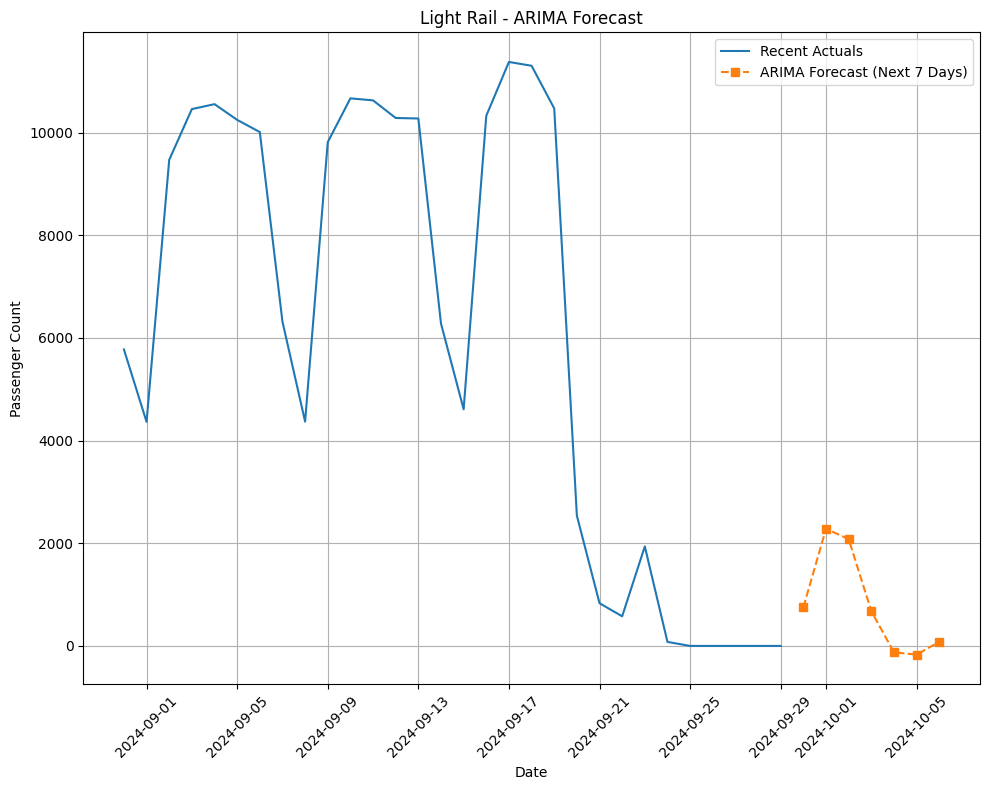

ARIMA Forecast for next 7 days:
2024-09-30     753.071550
2024-10-01    2280.116364
2024-10-02    2082.212630
2024-10-03     677.872033
2024-10-04    -125.097785
2024-10-05    -169.492432
2024-10-06      80.147128
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:             Light Rail   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16679.013
Date:                Mon, 26 May 2025   AIC                          33374.026
Time:                        12:08:36   BIC                          33418.494
Sample:                    07-01-2019   HQIC                         33390.388
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

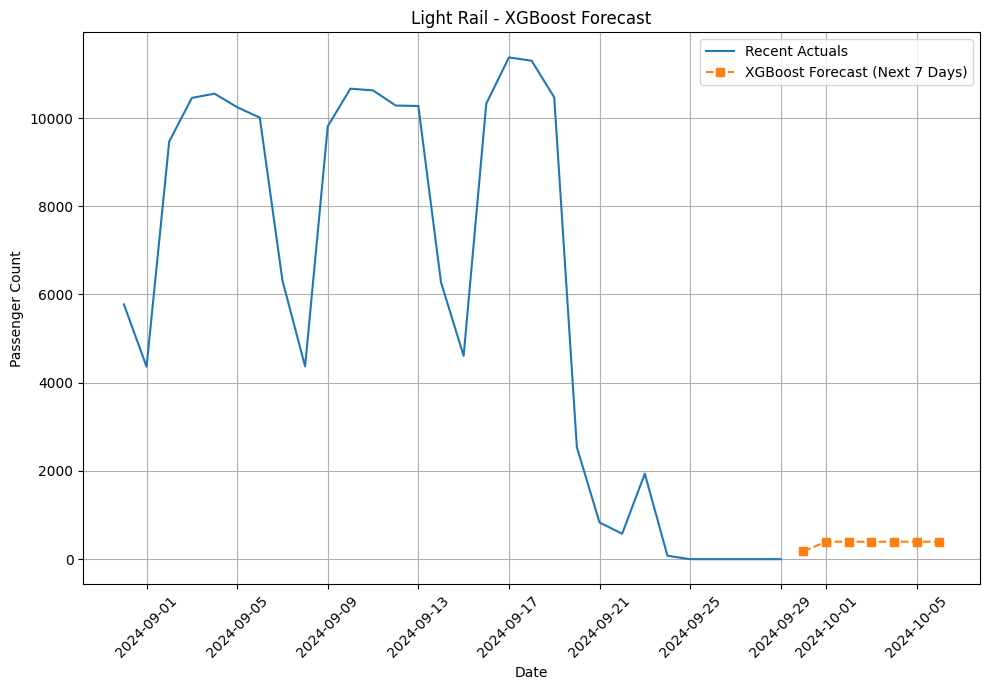

XGBoost Forecast for next 7 days:
2024-09-30    178.414948
2024-10-01    395.851410
2024-10-02    395.851410
2024-10-03    395.851410
2024-10-04    395.851410
2024-10-05    395.851410
2024-10-06    395.851410
Freq: D, dtype: float32

======= FORECASTING FOR PEAK SERVICE (NEXT 7 DAYS) =======

🔹 ARIMA:


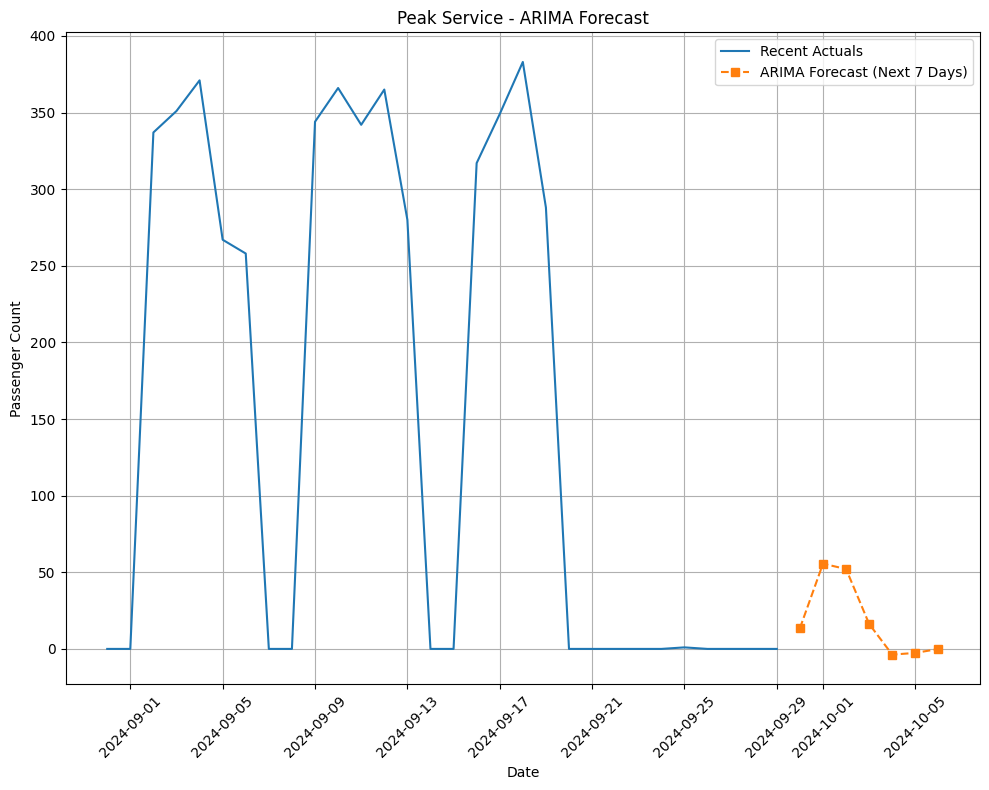

ARIMA Forecast for next 7 days:
2024-09-30    13.497545
2024-10-01    55.614809
2024-10-02    52.130907
2024-10-03    16.242501
2024-10-04    -3.723380
2024-10-05    -2.603866
2024-10-06    -0.032539
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:           Peak Service   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10965.584
Date:                Mon, 26 May 2025   AIC                          21947.168
Time:                        12:08:39   BIC                          21991.637
Sample:                    07-01-2019   HQIC                         21963.531
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

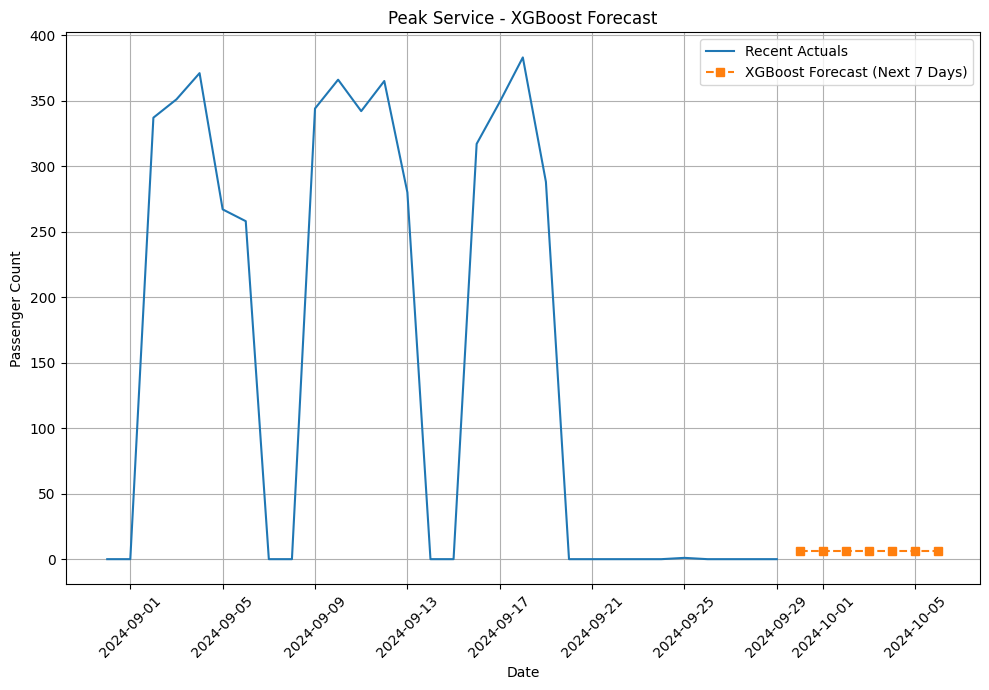

XGBoost Forecast for next 7 days:
2024-09-30    5.971745
2024-10-01    5.971745
2024-10-02    5.971745
2024-10-03    5.971745
2024-10-04    5.971745
2024-10-05    5.971745
2024-10-06    5.971745
Freq: D, dtype: float32

======= FORECASTING FOR RAPID ROUTE (NEXT 7 DAYS) =======

🔹 ARIMA:


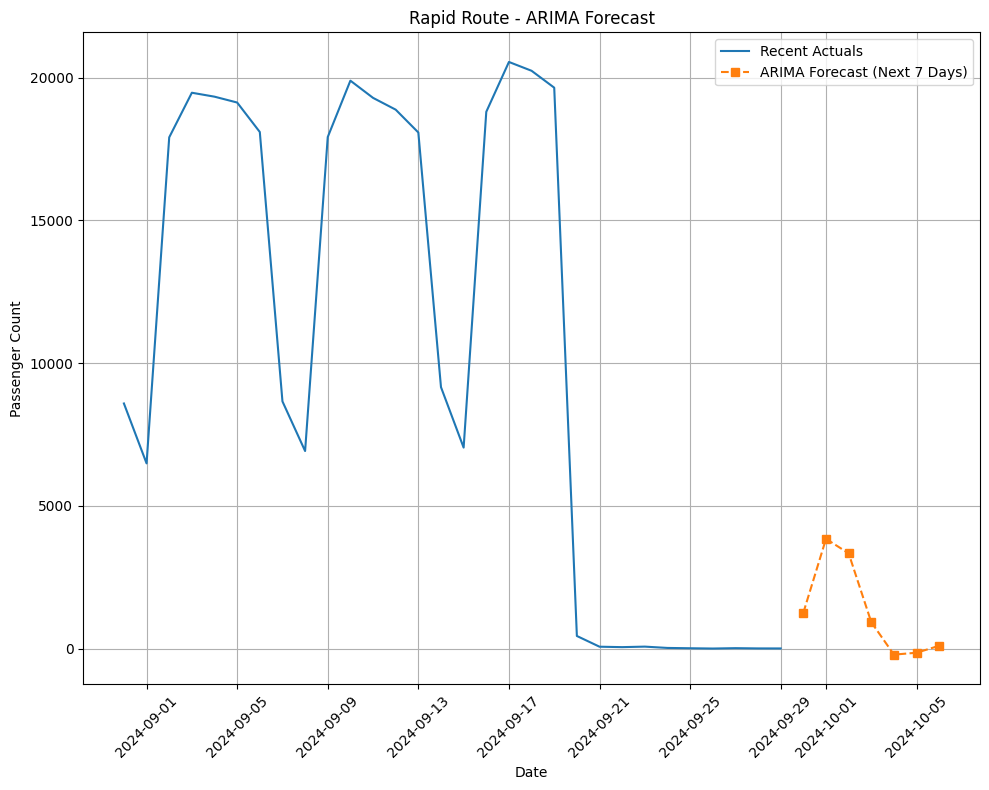

ARIMA Forecast for next 7 days:
2024-09-30    1253.415683
2024-10-01    3843.006934
2024-10-02    3335.496504
2024-10-03     922.361268
2024-10-04    -213.175669
2024-10-05    -147.066097
2024-10-06      97.837846
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            Rapid Route   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17985.496
Date:                Mon, 26 May 2025   AIC                          35986.993
Time:                        12:08:43   BIC                          36031.461
Sample:                    07-01-2019   HQIC                         36003.355
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

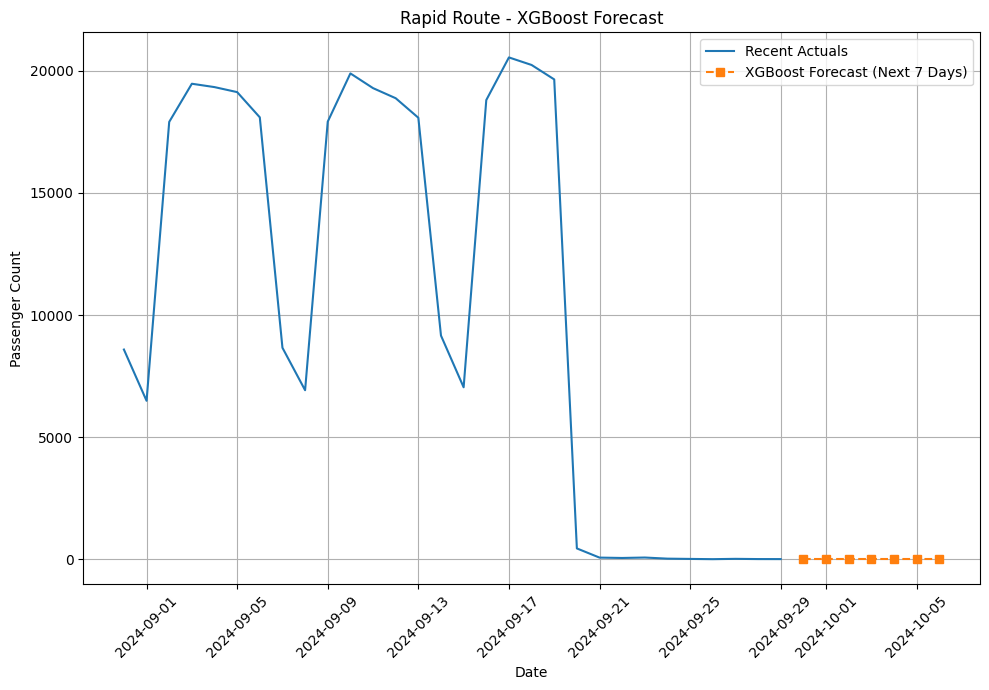

XGBoost Forecast for next 7 days:
2024-09-30    20.723936
2024-10-01    20.723936
2024-10-02    20.723936
2024-10-03    20.723936
2024-10-04    20.723936
2024-10-05    20.723936
2024-10-06    20.723936
Freq: D, dtype: float32

======= FORECASTING FOR SCHOOL (NEXT 7 DAYS) =======

🔹 ARIMA:


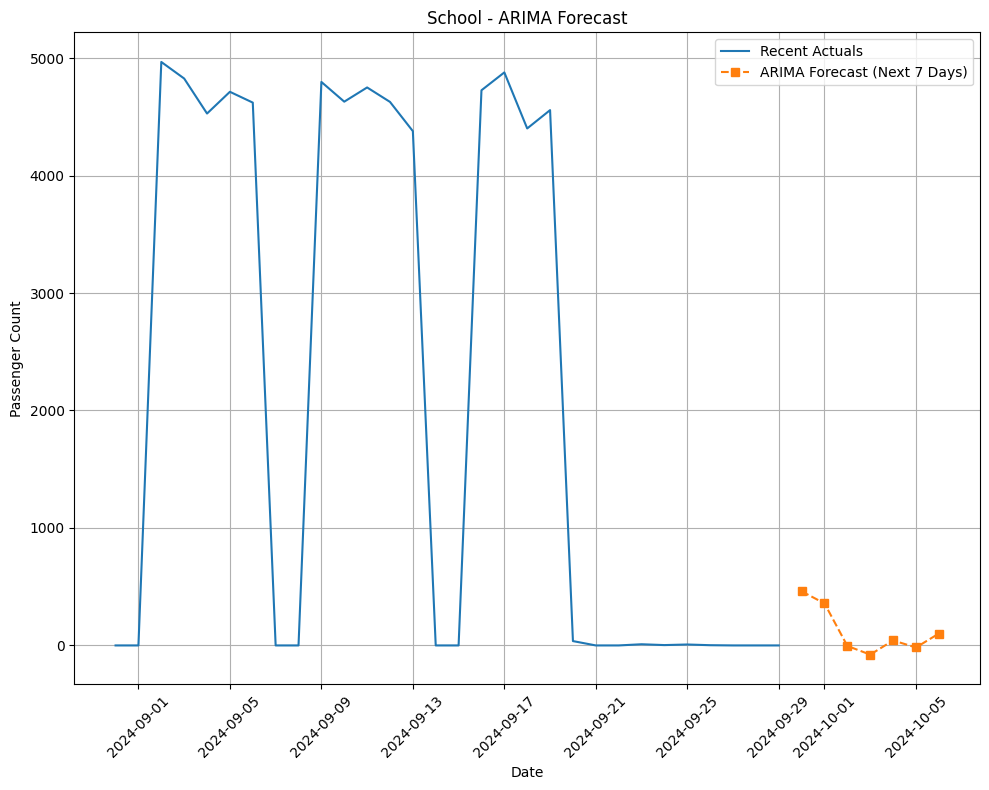

ARIMA Forecast for next 7 days:
2024-09-30    460.528968
2024-10-01    357.815525
2024-10-02     -4.422377
2024-10-03    -78.213031
2024-10-04     42.385805
2024-10-05    -17.348652
2024-10-06    100.986010
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 School   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16571.893
Date:                Mon, 26 May 2025   AIC                          33159.786
Time:                        12:08:45   BIC                          33204.254
Sample:                    07-01-2019   HQIC                         33176.149
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

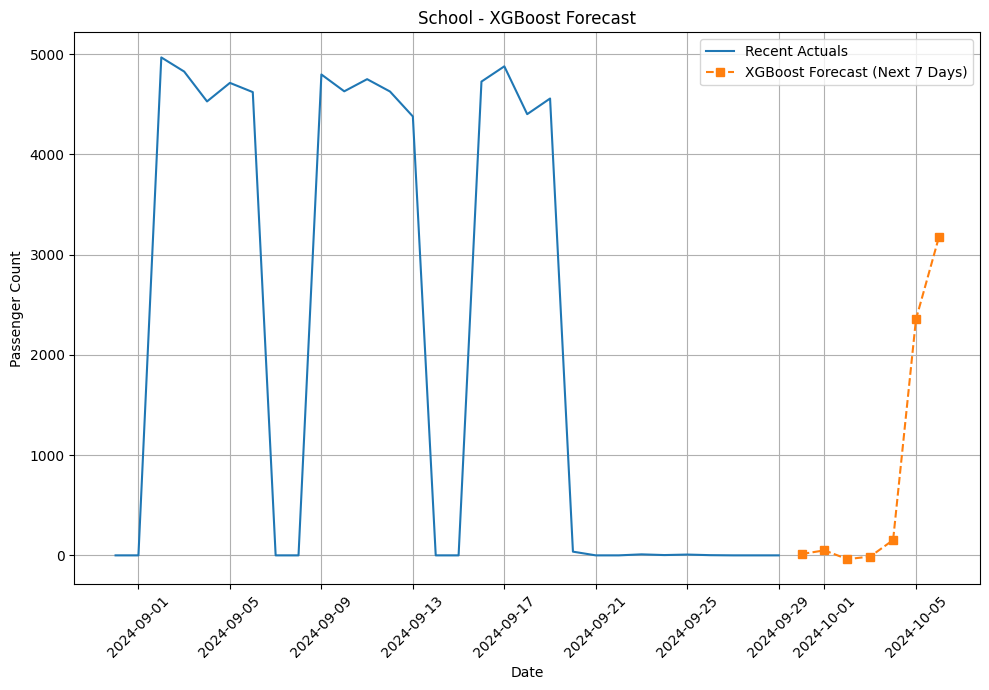

XGBoost Forecast for next 7 days:
2024-09-30      13.339114
2024-10-01      49.865147
2024-10-02     -37.946159
2024-10-03     -11.554516
2024-10-04     152.406967
2024-10-05    2354.289307
2024-10-06    3171.460938
Freq: D, dtype: float32


In [26]:
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for field in fields:
    print(f"\n======= FORECASTING FOR {field.upper()} (NEXT 7 DAYS) =======")
    series = df[field].dropna()

    print("\n🔹 ARIMA:")
    summary = forecast_arima_future(series, future_dates)
    print(summary)

    print("\n🔹 XGBoost:")
    forecast_xgb_future(series, future_dates)